In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
import libs.api_wrapper as api_wrapper

In [5]:
import cufflinks as cf

# Use these imports for offline development
import plotly.offline as py
py.init_notebook_mode() 
cf.go_offline()

# Use these imports for online publishing
# import plotly.plotly as py
# cf.go_online()

import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF
import libs.plotly_formatter as formatter

In [31]:
reload(api_wrapper)
reload(formatter)

<module 'libs.plotly_formatter' from 'libs\plotly_formatter.py'>

In [8]:
df_inputs = pd.read_csv('inputs\inputs.csv')
df = api_wrapper.get_fred_data(df_inputs)

Why should we use seasonally adjusted data? The BLS states, "As a general rule, the monthly employment and unemployment numbers reported in the news are seasonally adjusted data. Seasonally adjusted data are useful when comparing several months of data. Annual average estimates are calculated from the not seasonally adjusted data series."

http://www.bls.gov/cps/seasfaq.htm



In [ ]:
df_unemp = df[df_inputs['name'][df_inputs['group']=='unemp']]
#df_unemp.u6 -= df_unemp.u5
#df_unemp.u5 -= df_unemp.u4
#df_unemp.u4 -= df_unemp.unemp

cols = ['employed_persons', 'unemployed_persons','long term unemployment (U1)', 'job losers (U2)', 
        'unemployment rate (U3)', 'discouraged workers (U4)', 
        'not seeking employment (U5)', 'involuntary part time (U6)', 'total_jobs']
df_unemp.columns = cols

In [9]:
df_unemp.tail()

,employed_persons,unemployed_persons,long term unemployment (U1),job losers (U2),unemployment rate (U3),discouraged workers (U4),not seeking employment (U5),involuntary part time (U6),total_jobs
2016-07-01,151517,7770,2.0,2.3,4.9,5.2,6.0,9.7,144424
2016-08-01,151614,7849,1.9,2.4,4.9,5.3,5.9,9.7,144600
2016-09-01,151968,7939,2.0,2.5,5.0,5.3,6.0,9.7,144808
2016-10-01,151925,7787,2.0,2.3,4.9,5.2,5.9,9.5,144950
2016-11-01,152085,7400,1.8,2.2,4.6,5.0,5.8,9.3,145128


In [10]:
title = 'Alternative Unemployment Rates'
fig1 = df_unemp.ix[:,4:8].dropna(how='any').iplot(theme='white',dimensions=dims,
                                                 title=title,width=width, asFigure=True)
                                                                                                          
py.iplot(fig1)
#print 'Note: Each rate is inclusive of the previous rate (i.e. U4 includes unemployed in U3)'

unemployed + marginally attached / labor force + marginally attached

In [11]:
u5 = (df.unemployed_persons + df.marginally_attached_workers) / (df.civilian_labor_force + df.marginally_attached_workers)
u5.tail()

2016-07-01    0.060284
2016-08-01    0.059326
2016-09-01    0.060482
2016-10-01    0.058775
2016-11-01    0.057813
Freq: MS, dtype: float64

In [55]:
reload(api_wrapper)
reload(formatter)

<module 'libs.plotly_formatter' from 'libs\plotly_formatter.py'>

In [50]:
title = 'Unemployment Rate (percent of labor force)'
source = 'Source: Bureau of Labor Statistics<br>BLS Series ID: LNS14000000'
subtitle = 'Unemployment Rate continues its post-recession descent'

fig = formatter.format_standard_cufflinks_chart(df=df['unemp'].dropna(),title=title, source=source, subtitle=subtitle,
                                                height=500, width=700)
py.iplot(fig)

In [35]:
title = "Labor Force Participation Rate"
subtitle = "Participation fell 0.1% in November 2016"
source = 'Source: Bureau of Labor Statistics <br>BLS Series ID: LNS11300000'
fig = formatter.format_standard_cufflinks_chart(df=df['lfpr'].dropna(),title=title, source=source, subtitle=subtitle,
                                                height=500, width=700, color='blue')
py.iplot(fig)

In [57]:
title = "Monthly Job Growth (thousands of jobs)"
subtitle = "Job growth continues positive trend"
source = 'Source: Bureau of Labor Statistics, NickDoesData analysis<br>BLS Series ID: CES0000000001'

df_plot =  df['total_jobs'][df.index > '12/30/2009'].diff().dropna()
fig = formatter.format_standard_cufflinks_chart(df=df_plot,title=title, source=source, subtitle=subtitle, height=500, 
                                                width=700, color='green', zero_line_emphasis=True)
py.iplot(fig)

In [59]:
title = "Monthly Change in Employment (thousands of persons)"
subtitle = "Employment Growth has seen mixed results"
source = 'Source: Bureau of Labor Statistics, NickDoesData analysis<br>BLS Series ID: LNS12000000'

df_plot =  df['employed_persons'][df.index > '12/30/2009'].diff().dropna()
fig = formatter.format_standard_cufflinks_chart(df=df_plot,title=title, source=source, subtitle=subtitle, height=500, 
                                                width=700, color='blue', zero_line_emphasis=True)
py.iplot(fig)

In [60]:
jobs = df[['employed_persons', 'total_jobs']].dropna().diff().dropna()
jobs.columns = [ 'employment','jobs']

In [102]:
reload(formatter)
title = "Distribution of Monthly Changes Since 1980 (thousands)"
subtitle = "Months with negative job growth are rare, but more common <br>in employment growth"
#source = 'Source: Bureau of Labor Statistics, NickDoesData analysis<br>BLS Series ID: LNS12000000'

series_plot = jobs['jobs'][(jobs.index>'12/31/1979')&((jobs['jobs']>=-1000)| jobs['jobs']<=1000)]
fig_jobs_dist = formatter.format_dist_plot(series=series_plot, bin_size=100, color='green', title=title, series_name = "Jobs",
                                 subtitle=subtitle)

In [139]:
reload(formatter)
note = "Note: Data as of 12/2/2016. Histograms grouped into bins of 100. Colored tick marks indicate\
                                            <br>individual observations. Changes (positive or negative) of more than 1,000 are not shown. \
                                            <br>BLS Series IDs: CES0000000001,LNS12000000."
source = "Source: Bureau of Labor Statistics, NickDoesData analysis"
series_plot = jobs['employment'][(jobs.index>'12/31/1979')&((jobs['employment']>=-1000)| jobs['employment']<=1000)]

fig_employment_dist = formatter.format_dist_plot(series=series_plot, bin_size=100,  series_name = "Employment", 
                                                 source=source, note=note, height=375,color='rgb(54,128,191)')

In [140]:
py.iplot(fig_jobs_dist,show_link=False)
py.iplot(fig_employment_dist,show_link=False)

Appendix - Charts not used but would like to keep code

In [82]:
def confusion_matrix(row):
    if (row['employment']>0) & (row['jobs'] > 0):
        return 'both positive'
    elif (row['employment']>0) & (row['jobs'] < 0):
        return 'employment increase jobs decrease' 
    elif (row['employment']<0) & (row['jobs'] > 0):
        return 'employment decrease jobs increase' 
    else:
        return 'both decrease'

jobs['change'] = jobs.dropna().apply(confusion_matrix, axis=1)

In [84]:
jobs.head(10)

,employment,jobs,change
1948-02-01,135,-145,employment increase jobs decrease
1948-03-01,-525,144,employment decrease jobs increase
1948-04-01,620,-311,employment increase jobs decrease
1948-05-01,-437,425,employment decrease jobs increase
1948-06-01,889,238,both positive
1948-07-01,225,127,both positive
1948-08-01,-512,16,employment decrease jobs increase
1948-09-01,57,119,both positive
1948-10-01,-126,-44,both decrease
1948-11-01,30,-57,employment increase jobs decrease


In [94]:
jobs[jobs.index > '12/31/1979'].groupby('change').size() / len(jobs[jobs.index > '12/31/1979'])

change
both decrease                        0.155756
both positive                        0.604966
employment decrease jobs increase    0.167043
employment increase jobs decrease    0.072235
dtype: float64

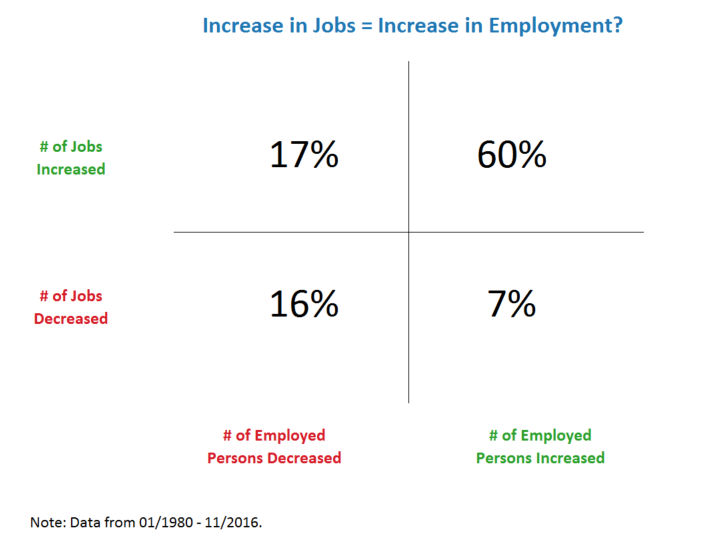

In [141]:
from IPython.display import Image
Image(filename='plots\jobs employment confusion matrix.png') 